In [ ]:
!pip install xlrd==1.2.0

In [ ]:
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx
import pandas as pd
import xlrd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
brands =  pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name='brands')
brands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
categories =  pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name='categories')
categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
products =  pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", sheet_name='products')
products

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


# 1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria


In [ ]:
products_categories = pd.merge(products,categories ,how = "inner", on="category_id")
products_categories_brands = pd.merge(products_categories,brands ,how = "inner", on="brand_id")[["product_name", "category_name", "brand_name"]]
products_categories_brands

,product_name,category_name,brand_name
0,Trek 820 - 2016,Mountain Bikes,Trek
1,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek
2,Trek Slash 8 27.5 - 2016,Mountain Bikes,Trek
3,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek
4,Trek X-Caliber 8 - 2017,Mountain Bikes,Trek
...,...,...,...
316,Pure Cycles Western 3-Speed - Women's - 2015/2016,Cruisers Bicycles,Pure Cycles
317,Pure Cycles William 3-Speed - 2016,Cruisers Bicycles,Pure Cycles
318,Strider Classic 12 Balance Bike - 2018,Children Bicycles,Strider
319,Strider Sport 16 - 2018,Children Bicycles,Strider


# 2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.


In [ ]:
numero_prodotti = pd.merge(products,categories ,how = "inner", on="category_id").groupby('category_name')['product_name'].count()
numero_prodotti

category_name
Cyclocross Bicycles    10
Electric Bikes         24
Comfort Bicycles       30
Children Bicycles      59
Mountain Bikes         60
Road Bikes             60
Cruisers Bicycles      78
Name: product_name, dtype: int64

<function matplotlib.pyplot.show>

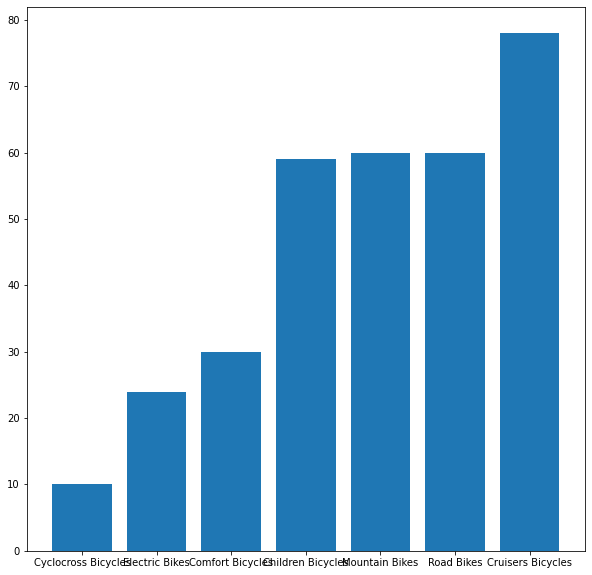

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.bar(numero_prodotti.index,numero_prodotti.values)
plt.show

# 3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti


In [ ]:
numero_brand = pd.merge(products,brands ,how = "inner", on="brand_id").groupby('brand_name')['product_name'].count()
numero_brand

brand_name
Electra         118
Haro             10
Heller            3
Pure Cycles       3
Ritchey           1
Strider           3
Sun Bicycles     23
Surly            25
Trek            135
Name: product_name, dtype: int64

<function matplotlib.pyplot.show>

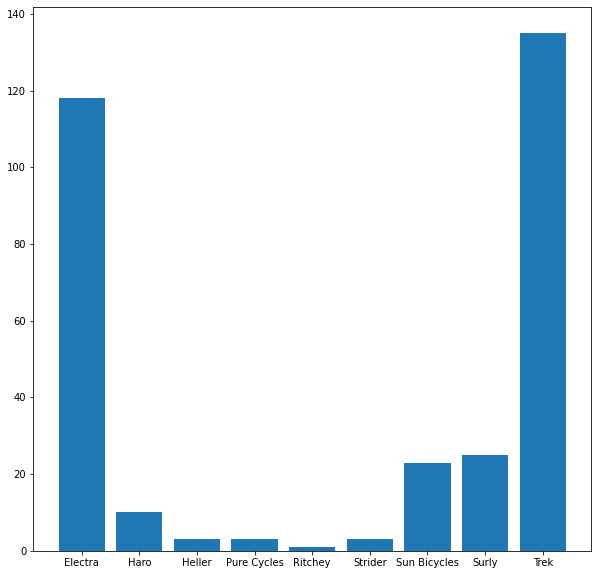

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.bar(numero_brand.index,numero_brand.values)
plt.show

# 4. i nomi dei prodotti della marca Trek


In [ ]:
brands_products = pd.merge(products,brands ,how = "inner", on="brand_id")
brands_products

,product_id,product_name,brand_id,category_id,model_year,list_price,brand_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Trek
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Trek
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Trek
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Trek
4,9,Trek Conduit+ - 2016,9,5,NaN,2999.99,Trek
...,...,...,...,...,...,...,...
316,93,Haro Shredder 20 Girls - 2017,2,1,2017.0,209.99,Haro
317,94,Haro Shredder Pro 20 - 2017,2,1,2017.0,249.99,Haro
318,263,Strider Classic 12 Balance Bike - 2018,6,1,2018.0,89.99,Strider
319,264,Strider Sport 16 - 2018,6,1,2018.0,249.99,Strider


In [ ]:

trek = brands_products[brands_products['brand_name'] == 'Trek'][['product_name']]
trek

,product_name
0,Trek 820 - 2016
1,Trek Fuel EX 8 29 - 2016
2,Trek Slash 8 27.5 - 2016
3,Trek Remedy 29 Carbon Frameset - 2016
4,Trek Conduit+ - 2016
...,...
130,Trek Checkpoint ALR 5 - 2019
131,Trek Checkpoint ALR 5 Women's - 2019
132,Trek Checkpoint SL 5 Women's - 2019
133,Trek Checkpoint SL 6 - 2019


# 5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome


In [ ]:
products_categories[products_categories["category_name"].str.contains('Bikes')]#[['category_name','product_name']]

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Mountain Bikes
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99,Mountain Bikes
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99,Mountain Bikes
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Mountain Bikes
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99,Mountain Bikes
...,...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99,Road Bikes
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99,Road Bikes
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99,Road Bikes
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99,Road Bikes


# 6. la categoria che ha il prodotto che costa di più


In [ ]:
products_categories[products_categories['list_price']== products_categories['list_price'].max()]

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name
285,155,Trek Domane SLR 9 Disc - 2018,9,7,2018.0,11999.99,Road Bikes


# 7. i brand con almeno 100 prodotti. Viaulizzare il nome del brand e il numero di prodotti


In [ ]:
prodottixbrand = brands_products.groupby('brand_name')['product_name'].count()
torta =  prodottixbrand[prodottixbrand>100]
torta

brand_name
Electra    118
Trek       135
Name: product_name, dtype: int64

<function matplotlib.pyplot.show>

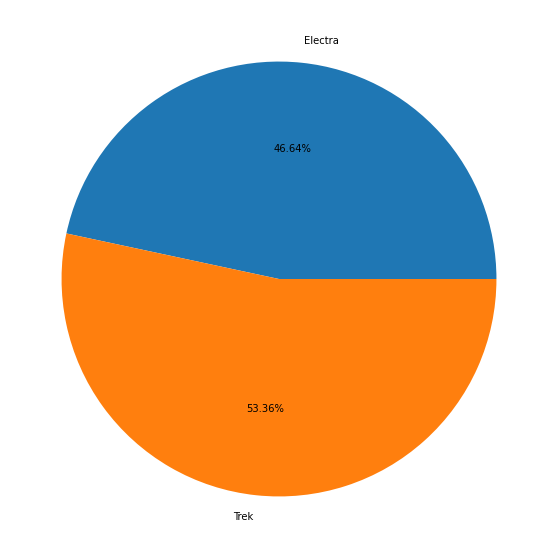

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(torta.values, labels=torta.index, autopct= '%1.2f%%')
plt.show

# 8. la marca del prodotto 'Electra Townie Original 21D - 2016'


In [ ]:
brands_products[brands_products['product_name'] == 'Electra Townie Original 21D - 2016'][['brand_name']]

,brand_name
164,Electra
173,Electra


# 9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti


In [ ]:
all = pd.merge(products_categories,brands ,how = "inner", on="brand_id")
all

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name,brand_name
0,1,Trek 820 - 2016,9,6,2016.0,379.99,Mountain Bikes,Trek
1,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99,Mountain Bikes,Trek
2,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99,Mountain Bikes,Trek
3,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99,Mountain Bikes,Trek
4,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99,Mountain Bikes,Trek
...,...,...,...,...,...,...,...,...
316,18,Pure Cycles Western 3-Speed - Women's - 2015/2016,4,3,2016.0,449.00,Cruisers Bicycles,Pure Cycles
317,19,Pure Cycles William 3-Speed - 2016,4,3,2016.0,449.00,Cruisers Bicycles,Pure Cycles
318,263,Strider Classic 12 Balance Bike - 2018,6,1,2018.0,89.99,Children Bicycles,Strider
319,264,Strider Sport 16 - 2018,6,1,2018.0,249.99,Children Bicycles,Strider


In [ ]:
torta2 = all.groupby('model_year')['product_name'].count()
torta2

model_year
2016.0     25
2017.0     85
2018.0    195
2019.0      6
Name: product_name, dtype: int64

<function matplotlib.pyplot.show>

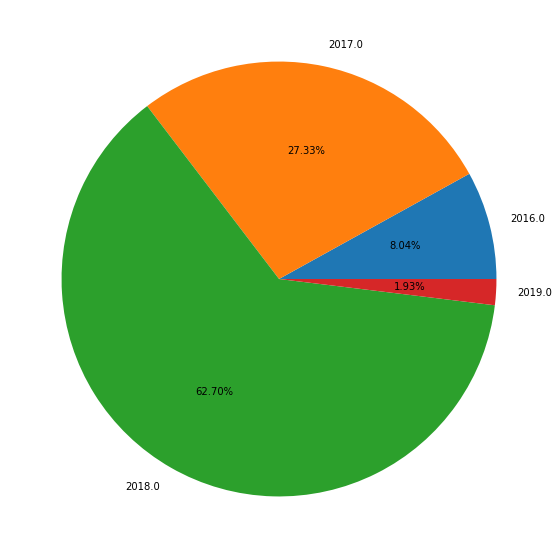

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(torta2.values, labels=torta2.index, autopct= '%1.2f%%')
plt.show